# Code to reproduce Figure 5

In [2]:
import obspy
import glob
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['font.family'] = ['Arial']

## Read in ML and TM catalogs

In [3]:
og_cat = obspy.core.event.read_events('result_catalogs/endquakes_2017.xml')

In [4]:
ml_cat = obspy.core.event.read_events('result_catalogs/ml_2017.xml',format='QUAKEML')

In [5]:
tm_cat = obspy.core.event.read_events('result_catalogs/tm_2017.xml',format='QUAKEML')

## Filter to only really keep good/locate-able events

In [6]:
# Filter template matching catalog
# Only keep those with cc sums of > 3.2 or < -3.2
keep_cat = obspy.core.event.catalog.Catalog()
for ev in tm_cat:
    s = ev.comments[2].text.split('=')[1]
    if float(s) > 3.2 or float(s) < -3.2:
        keep_cat.extend([ev])
tm_cat = keep_cat

In [7]:
# Filter ML catalog
# Only keep those with picks on at least 3 stations
keep_cat = obspy.core.event.catalog.Catalog()
for ev in ml_cat:
    sta = [p.waveform_id.station_code for p in ev.picks]
    if len(np.unique(sta)) >= 3:
        keep_cat.extend([ev])
ml_cat = keep_cat

## Subplot A: Plot as histogram over time

In [8]:
og_times = [ev.origins[0].time.datetime for ev in og_cat]
ml_times = [ev.origins[0].time.datetime for ev in ml_cat]
tm_times = [ev.picks[0].time.datetime for ev in tm_cat]

/var/folders/k7/tk8jpcf12gdbjj0htp_vqbtc0000gn/T/ipykernel_34854/1317146941.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


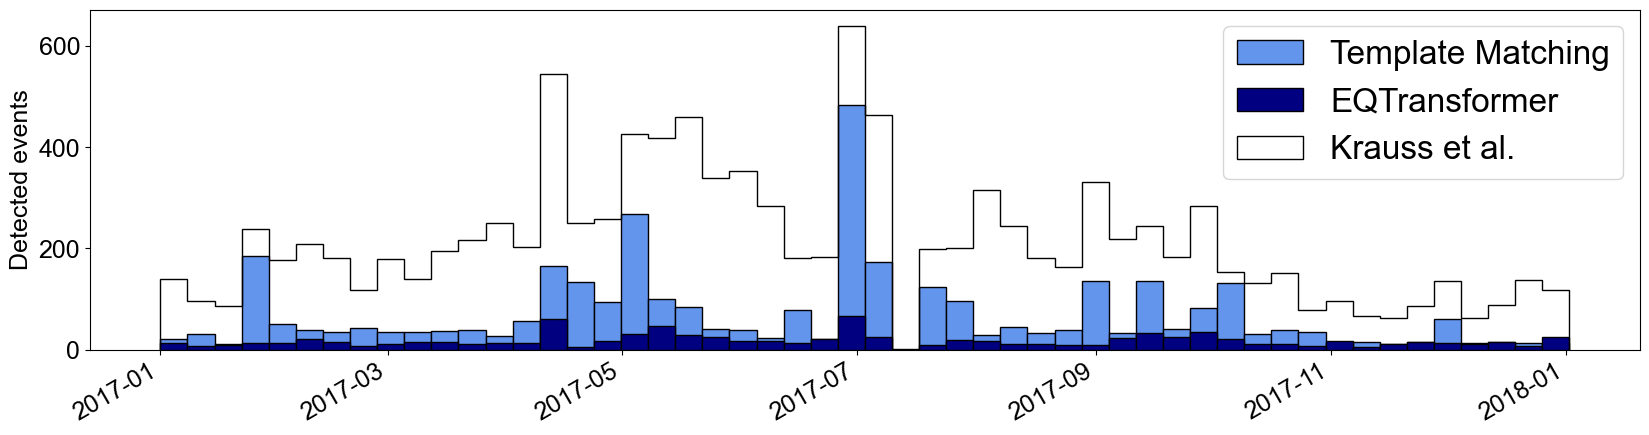

In [9]:
t1 = datetime.datetime(2017,1,1)
t2 = datetime.datetime(2018,1,2)

fig, ax = plt.subplots(figsize=(20,5))
matplotlib.rcParams['font.family'] = ['Arial']
matplotlib.rcParams.update({'font.size': 24})
tm_n,_,_ = ax.hist(tm_times, bins=52, range=(t1, t2),color='cornflowerblue', linewidth=1.0,label='Template Matching',edgecolor='black')
ml_n,_,_ = ax.hist(ml_times, bins=52, range=(t1, t2),color='navy', linewidth=1.0,label='EQTransformer',edgecolor='black')
og_n,_,_ = ax.hist(og_times, bins=52, range=(t1, t2),edgecolor='black', linewidth=1.0, histtype='step',label='Krauss et al.')
ax.legend()
ax.set_ylabel('Detected events')
fig.autofmt_xdate()
fig.show()

## Subplot B: Plot common picks

In [10]:
class PickComparison:
    def __init__(self):
        self.station = ''
        self.phase = ''
        self.channel = ''
        self.ml = []
        self.tm = []
        self.og = []
        self.tm_correct_cat = []
        self.ml_correct_cat = []

In [11]:
import pickle
with open('filtered_results/original_common_filtered.txt', 'rb') as f:
    comparisons = pickle.load(f)

In [12]:
og_times = []
ml_common_times = []
tm_common_times = []
for comp in comparisons:
    og_times.extend(comp.og)
    ml_common_times.extend(comp.ml)
    tm_common_times.extend(comp.tm)

/var/folders/k7/tk8jpcf12gdbjj0htp_vqbtc0000gn/T/ipykernel_34854/2452853044.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


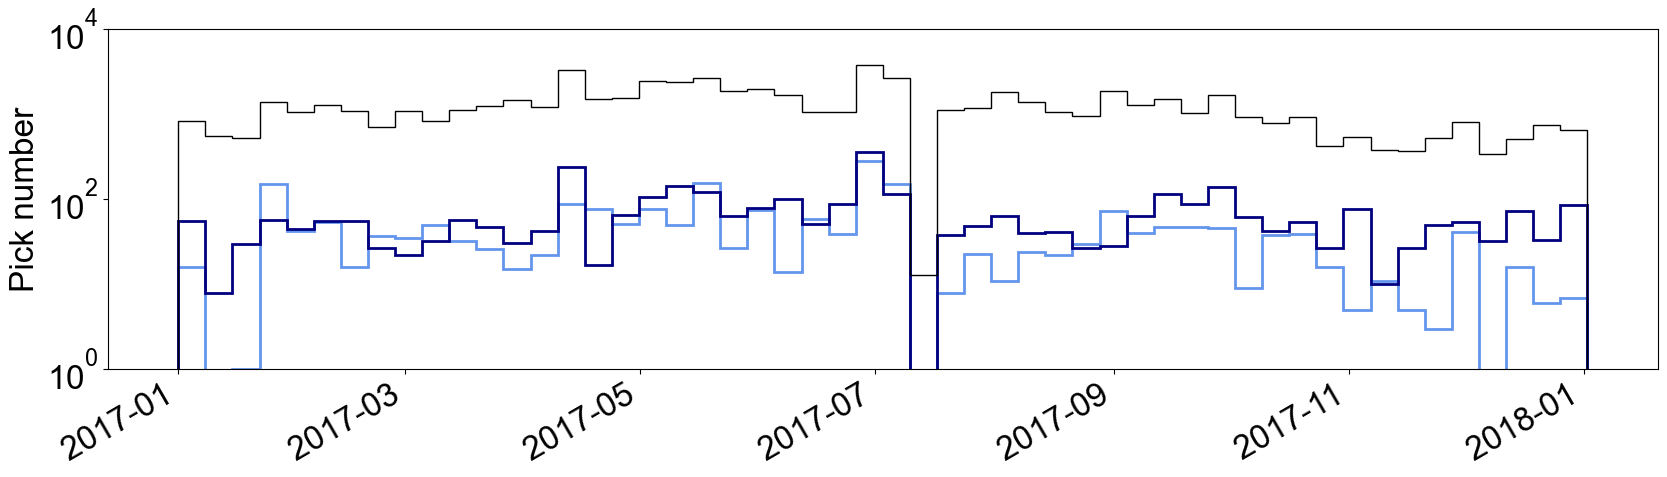

In [13]:
t1 = datetime.datetime(2017,1,1)
t2 = datetime.datetime(2018,1,2)

fig, ax = plt.subplots(figsize=(20,5))
matplotlib.rcParams['font.family'] = ['Arial']
matplotlib.rcParams.update({'font.size': 24})
tm_n,_,_ = ax.hist(tm_common_times, bins=52, range=(t1, t2),facecolor='none',linewidth=2.0,label='Template Matching',histtype='step',edgecolor='cornflowerblue')
ml_n,_,_ = ax.hist(ml_common_times, bins=52, range=(t1, t2),facecolor='none',linewidth=2.0,label='EQTransformer',edgecolor='navy',histtype='step')
og_n,_,_ = ax.hist(og_times, bins=52, range=(t1, t2),edgecolor='black', linewidth=1.0, histtype='step',label='Krauss et al.')
#ax.legend()
ax.set_yscale('log')
ax.set_ylim([10**0,10**4])
ax.set_ylabel('Pick number')
fig.autofmt_xdate()
fig.show()

## Subplot C: Plot "New" Picks

In [15]:
class PickComparison:
    def __init__(self):
        self.station = ''
        self.phase = ''
        self.channel = ''
        self.ml = []
        self.tm = []
        self.og = []
        self.tm_correct_cat = []
        self.ml_correct_cat = []

In [16]:
import pickle
with open('filtered_results/original_uncommon_filtered.txt', 'rb') as f:
    comparisons = pickle.load(f)

In [17]:
og_times = []
ml_common_times = []
tm_common_times = []
for comp in comparisons:
    og_times.extend(comp.og)
    ml_common_times.extend(comp.ml)
    tm_common_times.extend(comp.tm)

/var/folders/k7/tk8jpcf12gdbjj0htp_vqbtc0000gn/T/ipykernel_34854/3648649315.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


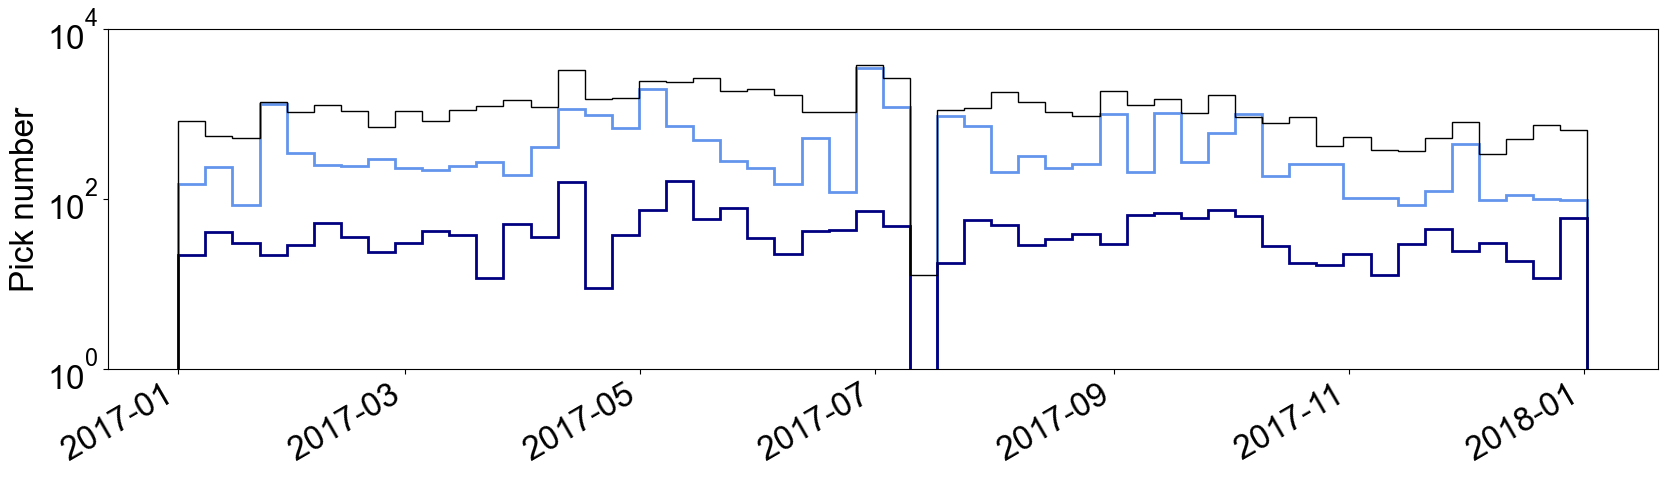

In [18]:
t1 = datetime.datetime(2017,1,1)
t2 = datetime.datetime(2018,1,2)

fig, ax = plt.subplots(figsize=(20,5))
matplotlib.rcParams['font.family'] = ['Arial']
matplotlib.rcParams.update({'font.size': 24})
tm_n,_,_ = ax.hist(tm_common_times, bins=52, range=(t1, t2),facecolor='none',linewidth=2.0,label='Template Matching',histtype='step',edgecolor='cornflowerblue')
ml_n,_,_ = ax.hist(ml_common_times, bins=52, range=(t1, t2),facecolor='none',linewidth=2.0,label='EQTransformer',edgecolor='navy',histtype='step')
og_n,_,_ = ax.hist(og_times, bins=52, range=(t1, t2),edgecolor='black', linewidth=1.0, histtype='step',label='Krauss et al.')
# ax.legend()
ax.set_yscale('log')
ax.set_ylim([10**0,10**4])
ax.set_ylabel('Pick number')
fig.autofmt_xdate()
fig.show()